<a href="https://colab.research.google.com/github/alibgil/CodingDojo-DataScience/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de ventas**

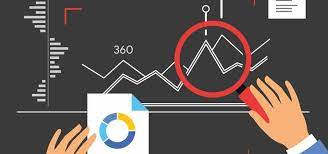

Predicción de ventas para productos alimenticios vendidos en diversas tiendas.  El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.

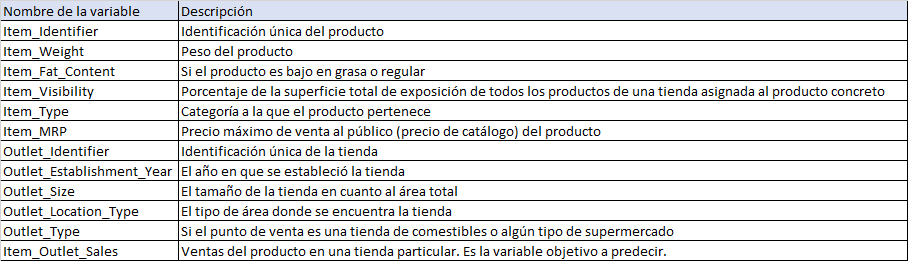

In [1]:
#Librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#Base de datos
from google.colab import drive
drive.mount('/content/drive')

filename= '/content/drive/MyDrive/BootCamp/sales_predictions.csv'

df = pd.read_csv(filename)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Minería de Datos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

A primera vista, para el tipo de variables de la BD se infiere que Item_Weight y Outlet_Size no se relacionan con el resto y por eso se procede a eliminarlas columnas. Tener en cuenta que para un análisis mas profundo para identificar si las variables se relacionan o no, es necesario utilizar métodos estadísticos como la correlación

In [ ]:
df.dropna(axis=1, inplace=True)
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 732.4+ KB


Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
cat_var = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object'] ]
for cat in cat_var:
  print(df[cat].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Tier 3    335

Se procede a homologar las categorías de la variable Item_Fat_Content

In [ ]:
df.replace({"LF": 'Low Fat', "low fat": 'Low Fat', "reg": 'Regular'}, inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


**Análisis estadístico**

Text(0.5, 1.0, '% exposición productos')

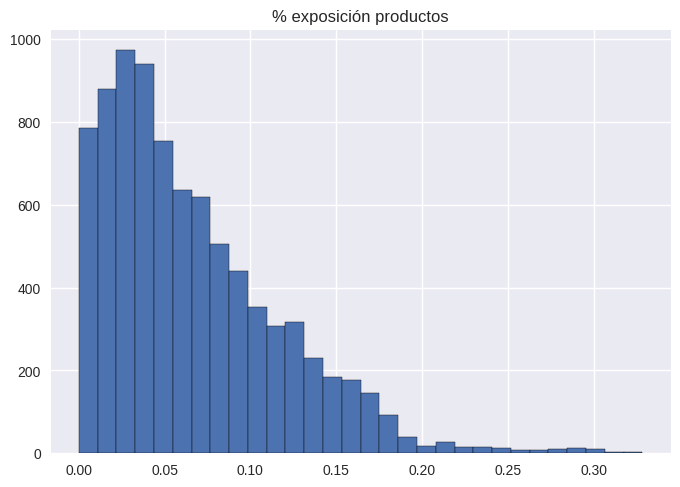

In [29]:
plt.style.use('seaborn')
df['Item_Visibility'].hist(bins = 30,edgecolor='black')
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('% exposición productos')

Text(0.5, 1.0, 'Ventas del producto')

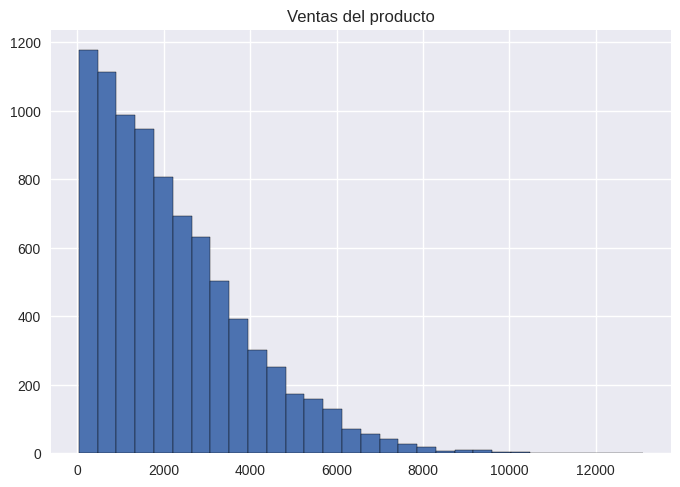

In [30]:
plt.style.use('seaborn')
df['Item_Outlet_Sales'].hist(bins = 30,edgecolor='black')
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Ventas del producto')

Con los anteriores histogramas podemos ver que tienen una frecuencia mas concentrada en sus valores mas pequeños y su distribución es asimétrica a la derecha; es decir, que la mayoría de los productos alimenticios vendidos cuentan con un porcentaje superficie total de exposición predominante pequeño y la frecuencia de las ventas esta principalmente enttre 0 y 2000. Para entender un poco mas variables que esten relacionas con las ventas realizaremos otros diagramas.

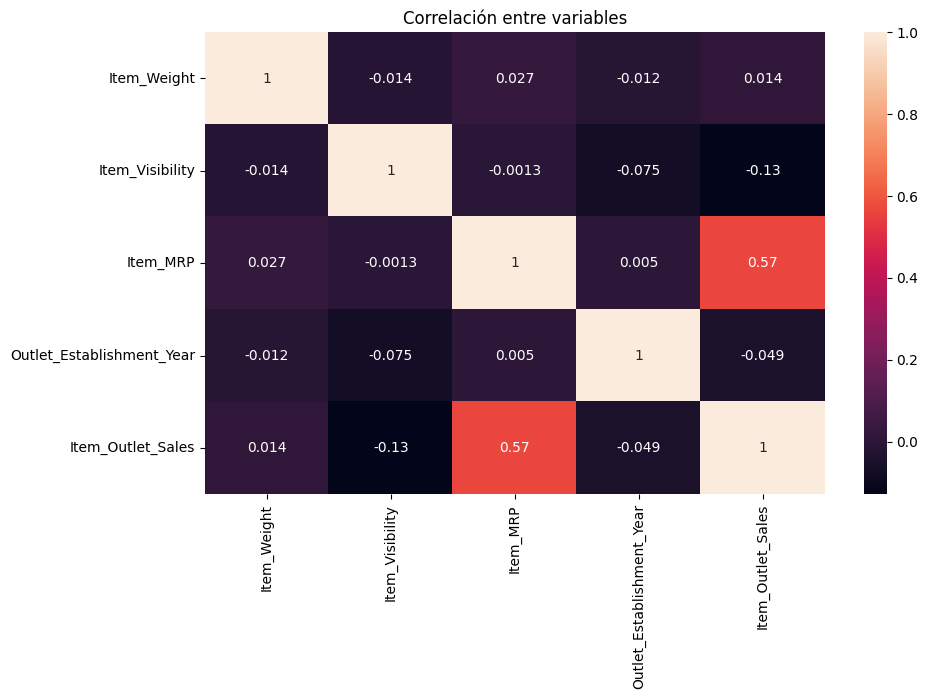

In [28]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot = True)
plt.title('Correlación entre variables')
plt.show()

En el diagrama anterior podemos identificar que la relación mas grande es entre Item_Outlet_Sales y Item_MRP, y aún así esta es moderada y positiva, es decir que las dos aumentan al mismo tiempo pero en proporción moderada. Finalmente se identifica que en general no una ninguna correlación fuerte entre las variables de la base de datos, es decir no tienen afectación entre sí, son variables independienets.

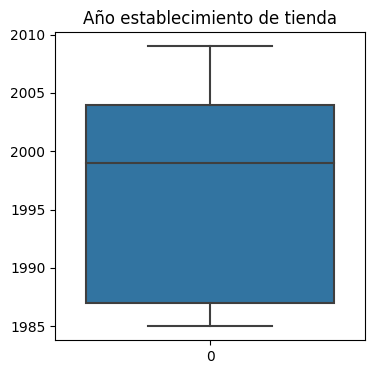

In [27]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=df['Outlet_Establishment_Year'])
plt.title('Año establecimiento de tienda')
plt.show()

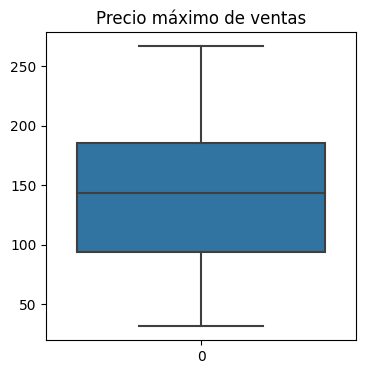

In [26]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=df['Item_MRP'])
plt.title('Precio máximo de ventas')
plt.show()

Las gráficas anteriores muestran que los datos tienen simetría, es decir, no estan tan dispersos.

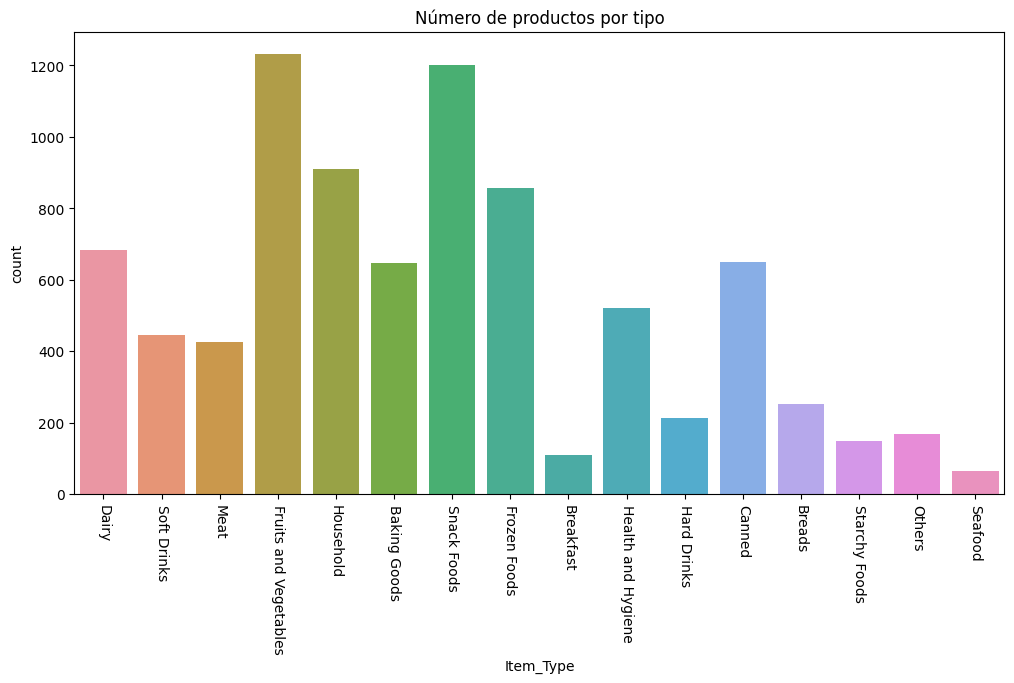

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Item_Type', 
              data=df)
 
# Rotate x-labels
plt.xticks(rotation=-90)
plt.title('Número de productos por tipo')
plt.show()

Mediante el gráfico anterior, se observa que los productos mas vendidos son Frutas y vegetabes, snacks, comida congelada y productos de hogar, por lo cual se debería reforzar las ventas en estos y tener estrategias si se quiere continuar con los otros productos

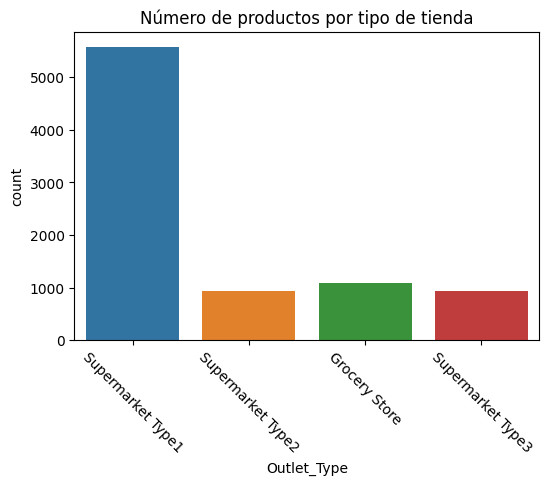

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outlet_Type', 
              data=df)
 
# Rotate x-labels
plt.xticks(rotation=-45)
plt.title('Número de productos por tipo de tienda')
plt.show()

Mediante el gráfico anterior, se observa que el tipo de tienda con mas relevancia es supermarket type 1, por lo tanto es importante revisar que tiene esta tienda que las otras no para aumentar las ventas de las otras

**Resumen de datos**

In [ ]:
# resumen de la informacion

def resumen_por_columna(df,cols):
    pd_series = df[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

In [ ]:
frames = []

for col in df.columns:
    aux_df = resumen_por_columna(df,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info

,columna,unicos,vacios
0,Item_Identifier,1559,0
1,Item_Fat_Content,2,0
2,Item_Visibility,7880,0
3,Item_Type,16,0
4,Item_MRP,5938,0
5,Outlet_Identifier,10,0
6,Outlet_Establishment_Year,9,0
7,Outlet_Location_Type,3,0
8,Outlet_Type,4,0
9,Item_Outlet_Sales,3493,0


In [3]:
# formato wide
df.pivot_table(index="Outlet_Identifier", 
                                     columns="Item_Type",
                                     values="Item_Outlet_Sales", 
                                     fill_value='', 
                                     aggfunc=pd.np.max)

<ipython-input-3-39393095281f>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  aggfunc=pd.np.max)


Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Outlet_Identifier,,,,,,,,,,,,,,,,
OUT010,792.3020,1524.0162,1094.5752,621.1914,1314.9550,1288.3230,1342.2528,756.3488,1482.0708,1775.6886,1575.2828,815.6050,431.4384,1102.5648,962.7468,852.2240
OUT013,6669.3186,4136.6154,6006.1818,6852.4136,10256.6490,6157.3184,7452.9652,7843.1240,5512.8240,6636.6944,6093.4016,5061.4116,2748.4224,9069.5276,6897.6880,4514.1240
OUT017,6795.1548,7064.8038,4548.0798,7247.2330,9664.7528,9275.9256,8760.5964,7084.1120,6231.8880,6849.0846,6002.8528,5060.0800,4532.7664,8245.2672,7685.9952,5712.5640
OUT018,5851.0504,5660.6316,6291.8100,6768.5228,6275.1650,6208.5850,6331.7580,4586.0304,5626.0100,6439.6176,6729.9064,5287.7836,5992.2000,6327.7632,5690.5926,3795.0600
OUT019,790.9704,622.5230,932.1200,1324.9420,975.3970,1106.5596,1010.6844,461.3994,1482.0708,1148.5050,1470.0864,815.6050,339.5580,1126.5336,934.7832,451.4124
OUT027,7759.8990,8958.3390,8209.3140,10306.5840,10236.6750,9678.0688,12117.5600,7152.0236,7142.7024,13086.9648,9390.4432,5546.1140,5704.5744,10993.6896,9554.2300,7443.6440
OUT035,7931.6754,6911.0040,6385.0220,6114.7072,8479.6288,7266.5412,7028.1848,6114.7072,6624.7100,7240.5750,5626.0100,5287.7836,4643.9550,7763.2280,6311.7840,7033.5112
OUT045,6426.3016,5494.8474,4660.6000,5865.0322,8323.8316,8851.1452,8994.9580,5888.3352,6145.3340,6795.1548,5274.4676,4649.9472,5992.2000,8604.7992,7696.6480,5642.6550
OUT046,6093.4016,6723.2484,4843.6950,7590.1200,7833.8028,6893.0274,6201.9270,6308.4550,9779.9362,5452.9020,5159.2842,4048.0640,6503.5344,5890.9984,5634.6654,8132.0812


En la tabla anterior podemos visualizar un resumen para cada tienda y cada tipo de producto cuales son sus ventas, y así observar de una manera mas fácil que tienda y producto hace un papel mas importante, como lo es por ejemplo la tienda OUT027 y los productos del hogar

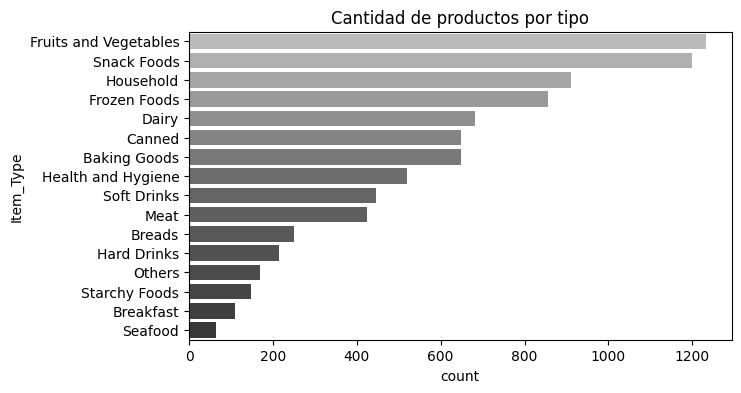

In [17]:
# bar plot: tienda (Outlet_Identifier)

plt.style.use('default')
plt.figure(figsize=(7,4))

plotting = sns.countplot(
    y="Item_Type",
    data=df,
    order=df['Item_Type'].value_counts().index,
    palette="Greys_d",
    linewidth=3
)
plt.title('Cantidad de productos por tipo')
plt.show()

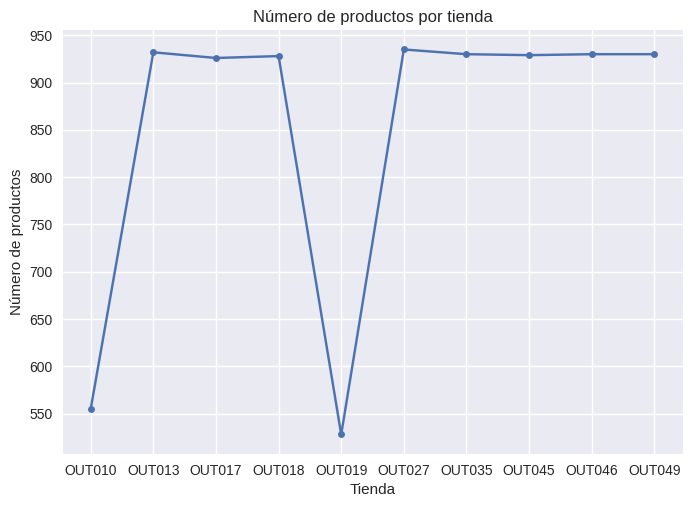

In [16]:
#Transformación de datos en lista y mapeado por únicos
numberUniqueproduct = df.groupby(['Outlet_Identifier'])['Item_Identifier'].nunique()

uniqueoutlet = list(numberUniqueproduct.index)

numProduct = list(numberUniqueproduct.values)



plt.xlabel('Tienda')
plt.ylabel('Número de productos')
plt.title('Número de productos por tienda')
plt.style.use('seaborn')
plt.plot(uniqueoutlet, numProduct, marker = '.', markersize = 10)

En el gráfico anterior se puede evidenciar mas directo cuales son las tiendas que menos productos tienen y posiblemente menos ventas, por lo cual se sugiere separar estas tiendas con altos y bajos productos para identificar que tienen en comun en cuanto a las ventas